---

## Observations and Insights

##### Data is same size,
When the merge was made, all rows had the same size. That was the first observation made to really be able to work with the data, also no data was corrupted, NA, or other type.

##### Drug Regimen results first glance
The summary statistics table shows that Capomulin has the lowest Tumor Volume values so it may prove Capomulin as a candidate for the best drug in this study. While Ketapril has proven to be a weak contendant. 

##### Drug Regimen results samples
Capomulin has more samples compared to the rest so we cannot really compare them in equal conditions, we need to  create a random sample of 100 population for each Drug Regimen and analyse again the results.

##### Even Male and Female population
The studies are almost equally evaluating both female and male population, so this means that a random sample would throw similar male vs female mice proporion.

##### Capomulin Outliers
With a random capomulin sample we should again compare outliers to see if we get similar results, as few of the mice tests were outliying values.

##### Capomulin Correlation between Mice Weight and Avg Tumor Volume
The person correlation coefficient shows a strong positive correllation tha weight influences the average tumor volume of each mice treated with Capomulin. We need to take into consideration weight in our next study to better guarantee this hypothesis.

## Dependencies and starter code

In [223]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy  as np

# Study data files
mouse_metadata = 'data/Mouse_metadata.csv'
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata)
study_results_df = pd.read_csv(study_results)

# Combine the data into a single dataset

In [5]:
mouse_metadata_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [6]:
study_results_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [7]:
data_files_df = pd.merge(mouse_metadata_df, study_results_df, on='Mouse ID', how='outer')
data_files_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
data_files_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [298]:
data_files_df['Mouse ID'].unique()

array(['k403', 's185', 'x401', 'm601', 'g791', 's508', 'f966', 'm546',
       'z578', 'j913', 'u364', 'n364', 'y793', 'r554', 'm957', 'c758',
       't565', 'a644', 'i177', 'j989', 'i738', 'a520', 'w914', 'r811',
       'g288', 'i334', 'q610', 'd251', 'l897', 'c458', 'b742', 'b128',
       'j246', 'a411', 'j119', 'w150', 'v923', 'g316', 's710', 'l509',
       'r944', 'e662', 'u196', 'q597', 'a444', 'i557', 'r921', 'w678',
       'y449', 'a203', 'a251', 'a262', 'a275', 'a366', 'a401', 'a457',
       'a492', 'a577', 'a685', 'a699', 'a788', 'a818', 'a897', 'a963',
       'b313', 'b447', 'b487', 'b559', 'b759', 'b879', 'c139', 'c264',
       'c282', 'c302', 'c326', 'c402', 'c559', 'c580', 'c757', 'c766',
       'c819', 'c832', 'c895', 'c927', 'd133', 'd164', 'd474', 'e213',
       'e227', 'e291', 'e476', 'e584', 'f129', 'f234', 'f278', 'f345',
       'f394', 'f436', 'f545', 'f932', 'f993', 'g107', 'g296', 'g497',
       'g558', 'g570', 'g867', 'g989', 'h246', 'h333', 'h428', 'h531',
      

In [299]:
data_files_df['Drug Regimen'].unique()

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [300]:
data_files_df['Sex'].unique()

array(['Male', 'Female'], dtype=object)

In [301]:
data_files_df['Age_months'].unique()

array([21,  3, 16, 22, 11,  1, 18,  4, 17,  8,  9, 20,  7, 10, 23, 13, 24,
       19, 12,  5,  6,  2, 14, 15])

In [302]:
data_files_df['Weight (g)'].unique()

array([16, 17, 15, 19, 18, 20, 21, 22, 23, 25, 24, 29, 28, 30, 27, 26])

In [315]:
data_files_df['Timepoint'].unique()

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45])

In [316]:
data_files_df['Tumor Volume (mm3)'].dtype

dtype('float64')

In [317]:
data_files_df['Metastatic Sites'].unique()

array([0, 1, 2, 3, 4])

## Summary statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
data_files_grouped = data_files_df.groupby('Drug Regimen').agg({
    'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']
})
data_files_grouped.columns = data_files_grouped.columns.droplevel(0)
data_files_grouped.columns = [f'Tumor Volume (mm3) {column.capitalize()}' for column in data_files_grouped.columns.ravel()]
data_files_grouped.round(3)


,Tumor Volume (mm3) Mean,Tumor Volume (mm3) Median,Tumor Volume (mm3) Var,Tumor Volume (mm3) Std,Tumor Volume (mm3) Sem
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.323,50.855,42.351,6.508,0.513
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


## Bar plots

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     161
Name: Drug Regimen, dtype: int64


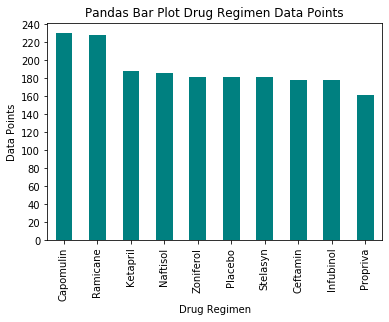

In [293]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
drug_regimen_series = data_files_df['Drug Regimen'].value_counts()
print(drug_regimen_series)
drug_regimen_series.plot(kind='bar', color='teal')
plt.title('Pandas Bar Plot Drug Regimen Data Points')
plt.xlabel('Drug Regimen')
plt.ylabel('Data Points')
plt.yticks(range(0,250,20))
plt.show()

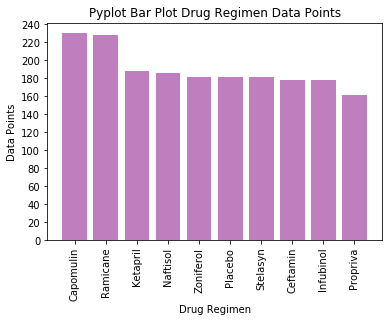

In [11]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
drug_regime_x_axis = [regimen for regimen in drug_regimen_series.index]
plt.bar(drug_regime_x_axis, drug_regimen_series, color='purple', alpha=0.5)
plt.title('Pyplot Bar Plot Drug Regimen Data Points')
plt.xlabel('Drug Regimen')
plt.xticks(drug_regime_x_axis, rotation=90)
plt.ylabel('Data Points')
plt.yticks(range(0,250,20))
plt.show()

## Pie plots

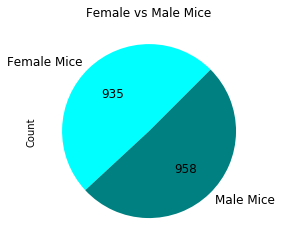

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
data_files_grouped2 = data_files_df.groupby(['Sex']).agg({
    'Sex': ['count']
})
data_files_grouped2.columns = data_files_grouped2.columns.droplevel(0)
data_files_grouped2.columns = ['Count']
total = data_files_grouped2['Count'].sum()
sex_count = data_files_grouped2['Count']
sex_count.plot(
    kind='pie', 
    colors=['cyan', 'teal'], 
    labels=['Female Mice', 'Male Mice'],
    fontsize=12, 
    autopct=lambda p: '{:.0f}'.format(p * total / 100),
    startangle=45
)
plt.title('Female vs Male Mice')
plt.show()

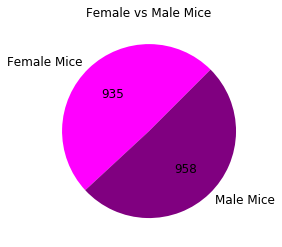

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_count,
    colors=['magenta', 'purple'], 
    labels=['Female Mice', 'Male Mice'], 
    autopct=lambda p: '{:.0f}'.format(p * total / 100),
    startangle=45,
    textprops={'fontsize':12}
    )
plt.title('Female vs Male Mice')
plt.show()

In [14]:
data_files_df.loc[(data_files_df['Drug Regimen'] == 'Infubinol') & (data_files_df['Mouse ID'] == 'a203')]['Tumor Volume (mm3)'].sum()

563.12707705

## Quartiles, outliers and boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
data_files_grouped3 = data_files_df.groupby(['Mouse ID', 'Drug Regimen']).agg({
    'Tumor Volume (mm3)': 'sum',
}).rename(columns={ 'Tumor Volume (mm3)': 'Total Tumor Volume (mm3)' })
final_tumor_volume_df = data_files_grouped3.reset_index()
final_tumor_volume_df = final_tumor_volume_df.set_index('Mouse ID')
final_tumor_volume_df


,Drug Regimen,Total Tumor Volume (mm3)
Mouse ID,,
a203,Infubinol,563.127077
a251,Infubinol,552.370946
a262,Placebo,586.116306
a275,Ceftamin,527.709651
a366,Stelasyn,382.479341
...,...,...
z435,Propriva,140.826641
z578,Ramicane,384.115100
z581,Infubinol,539.795837


In [16]:
final_tumor_volume_df['Drug Regimen'].value_counts()

Ketapril     25
Ceftamin     25
Capomulin    25
Propriva     25
Ramicane     25
Infubinol    25
Zoniferol    25
Placebo      25
Naftisol     25
Stelasyn     24
Name: Drug Regimen, dtype: int64

#### Capomulin Total Volume Tumor

In [122]:
final_tumor_volume_capomulin_df = final_tumor_volume_df.loc[final_tumor_volume_df['Drug Regimen'] == 'Capomulin']
final_tumor_volume_capomulin_df.head()

,Drug Regimen,Total Tumor Volume (mm3)
Mouse ID,,
b128,Capomulin,419.636
b742,Capomulin,400.837
f966,Capomulin,182.530
g288,Capomulin,419.901
g316,Capomulin,446.133


In [137]:
total_tumor_volumes_capomulin = final_tumor_volume_capomulin_df['Total Tumor Volume (mm3)']
capomulin_quartiles = total_tumor_volumes_capomulin.quantile([.25,.5,.75])
lowerq_capomulin = round(capomulin_quartiles[0.25],3)
median_capomulin = round(capomulin_quartiles[0.5],3)
upperq_capomulin = round(capomulin_quartiles[0.75],3)
iqr_capomulin = round(upperq_capomulin-lowerq_capomulin,3)
print(f"The lower quartile of total tumor volumes in capomulin is: {lowerq_capomulin}")
print(f"The upper quartile of total tumor volumes in capomulin is: {upperq_capomulin}")
print(f"The interquartile range of total tumor volumes in capomulin is: {iqr_capomulin}")
print(f"The the median of total tumor volumes in capomulin is: {median_capomulin} ")

lower_bound_capomulin = round(lowerq_capomulin - (1.5*iqr_capomulin),3)
upper_bound_capomulin = round(upperq_capomulin + (1.5*iqr_capomulin),3)
print(f"Values below {lower_bound_capomulin} could be outliers in capomulin.")
print(f"Values above {upper_bound_capomulin} could be outliers in capomulin.")

The lower quartile of total tumor volumes in capomulin is: 361.82
The upper quartile of total tumor volumes in capomulin is: 425.073
The interquartile range of total tumor volumes in capomulin is: 63.253
The the median of total tumor volumes in capomulin is: 398.875 
Values below 266.94 could be outliers in capomulin.
Values above 519.952 could be outliers in capomulin.


#### Ramicane Total Volume Tumor

In [135]:
final_tumor_volume_ramicane_df = final_tumor_volume_df.loc[final_tumor_volume_df['Drug Regimen'] == 'Ramicane']
final_tumor_volume_ramicane_df.head()

,Drug Regimen,Total Tumor Volume (mm3)
Mouse ID,,
a411,Ramicane,407.014
a444,Ramicane,430.601
a520,Ramicane,379.892
a644,Ramicane,412.286
c458,Ramicane,295.884


In [140]:
total_tumor_volumes_ramicane = final_tumor_volume_ramicane_df['Total Tumor Volume (mm3)']
ramicane_quartiles = total_tumor_volumes_ramicane.quantile([.25,.5,.75])
lowerq_ramicane = round(ramicane_quartiles[0.25],3)
median_ramicane = round(ramicane_quartiles[0.5],3)
upperq_ramicane = round(ramicane_quartiles[0.75],3)
iqr_ramicane = round(upperq_ramicane-lowerq_ramicane,3)
print(f"The lower quartile of total tumor volumes in ramicane is: {lowerq_ramicane}")
print(f"The upper quartile of total tumor volumes in ramicane is: {upperq_ramicane}")
print(f"The interquartile range of total tumor volumes in ramicane is: {iqr_ramicane}")
print(f"The the median of total tumor volumes in ramicane is: {median_ramicane} ")

lower_bound_ramicane = round(lowerq_ramicane - (1.5*iqr_ramicane),3)
upper_bound_ramicane = round(upperq_ramicane + (1.5*iqr_ramicane),3)
print(f"Values below {lower_bound_ramicane} could be outliers in ramicane.")
print(f"Values above {upper_bound_ramicane} could be outliers in ramicane.")

The lower quartile of total tumor volumes in ramicane is: 360.502
The upper quartile of total tumor volumes in ramicane is: 407.014
The interquartile range of total tumor volumes in ramicane is: 46.512
The the median of total tumor volumes in ramicane is: 388.078 
Values below 290.734 could be outliers in ramicane.
Values above 476.782 could be outliers in ramicane.


#### Infubinol Total Volume Tumor

In [155]:
final_tumor_volume_infubinol_df = final_tumor_volume_df.loc[final_tumor_volume_df['Drug Regimen'] == 'Infubinol']
final_tumor_volume_infubinol_df.head()

,Drug Regimen,Total Tumor Volume (mm3)
Mouse ID,,
a203,Infubinol,563.127
a251,Infubinol,552.371
a577,Infubinol,355.400
a685,Infubinol,530.115
c139,Infubinol,587.409


In [154]:
total_tumor_volumes_infubinol = final_tumor_volume_infubinol_df['Total Tumor Volume (mm3)']
infubinol_quartiles = total_tumor_volumes_infubinol.quantile([.25,.5,.75])
lowerq_infubinol = round(infubinol_quartiles[0.25],3)
median_infubinol = round(infubinol_quartiles[0.5],3)
upperq_infubinol = round(infubinol_quartiles[0.75],3)
iqr_infubinol = round(upperq_infubinol-lowerq_infubinol,3)
print(f"The lower quartile of total tumor volumes in infubinol is: {lowerq_infubinol}")
print(f"The upper quartile of total tumor volumes in infubinol is: {upperq_infubinol}")
print(f"The interquartile range of total tumor volumes in infubinol is: {iqr_infubinol}")
print(f"The the median of total tumor volumes in infubinol is: {median_infubinol} ")

lower_bound_infubinol = round(lowerq_infubinol - (1.5*iqr_infubinol),3)
upper_bound_infubinol = round(upperq_infubinol + (1.5*iqr_infubinol),3)
print(f"Values below {lower_bound_infubinol} could be outliers in infubinol.")
print(f"Values above {upper_bound_infubinol} could be outliers in infubinol.")

The lower quartile of total tumor volumes in infubinol is: 250.343
The upper quartile of total tumor volumes in infubinol is: 539.796
The interquartile range of total tumor volumes in infubinol is: 289.453
The the median of total tumor volumes in infubinol is: 368.771 
Values below -183.836 could be outliers in infubinol.
Values above 973.976 could be outliers in infubinol.


#### Ceftamin Total Volume Tumor

In [156]:
final_tumor_volume_ceftamin_df = final_tumor_volume_df.loc[final_tumor_volume_df['Drug Regimen'] == 'Ceftamin']
final_tumor_volume_ceftamin_df.head()

,Drug Regimen,Total Tumor Volume (mm3)
Mouse ID,,
a275,Ceftamin,527.710
b447,Ceftamin,45.000
b487,Ceftamin,300.047
b759,Ceftamin,359.000
f436,Ceftamin,188.240


In [159]:
total_tumor_volumes_ceftamin = final_tumor_volume_ceftamin_df['Total Tumor Volume (mm3)']
ceftamin_quartiles = total_tumor_volumes_ceftamin.quantile([.25,.5,.75])
lowerq_ceftamin = round(ceftamin_quartiles[0.25],3)
median_ceftamin = round(ceftamin_quartiles[0.5],3)
upperq_ceftamin = round(ceftamin_quartiles[0.75],3)
iqr_ceftamin = round(upperq_ceftamin-lowerq_ceftamin,3)
print(f"The lower quartile of total tumor volumes in ceftamin is: {lowerq_ceftamin}")
print(f"The upper quartile of total tumor volumes in ceftamin is: {upperq_ceftamin}")
print(f"The interquartile range of total tumor volumes in ceftamin is: {iqr_ceftamin}")
print(f"The the median of total tumor volumes in ceftamin is: {median_ceftamin} ")

lower_bound_ceftamin = round(lowerq_ceftamin - (1.5*iqr_ceftamin),3)
upper_bound_ceftamin = round(upperq_ceftamin + (1.5*iqr_ceftamin),3)
print(f"Values below {lower_bound_ceftamin} could be outliers in ceftamin.")
print(f"Values above {upper_bound_ceftamin} could be outliers in ceftamin.")

The lower quartile of total tumor volumes in ceftamin is: 188.24
The upper quartile of total tumor volumes in ceftamin is: 534.674
The interquartile range of total tumor volumes in ceftamin is: 346.434
The the median of total tumor volumes in ceftamin is: 516.111 
Values below -331.411 could be outliers in ceftamin.
Values above 1054.325 could be outliers in ceftamin.


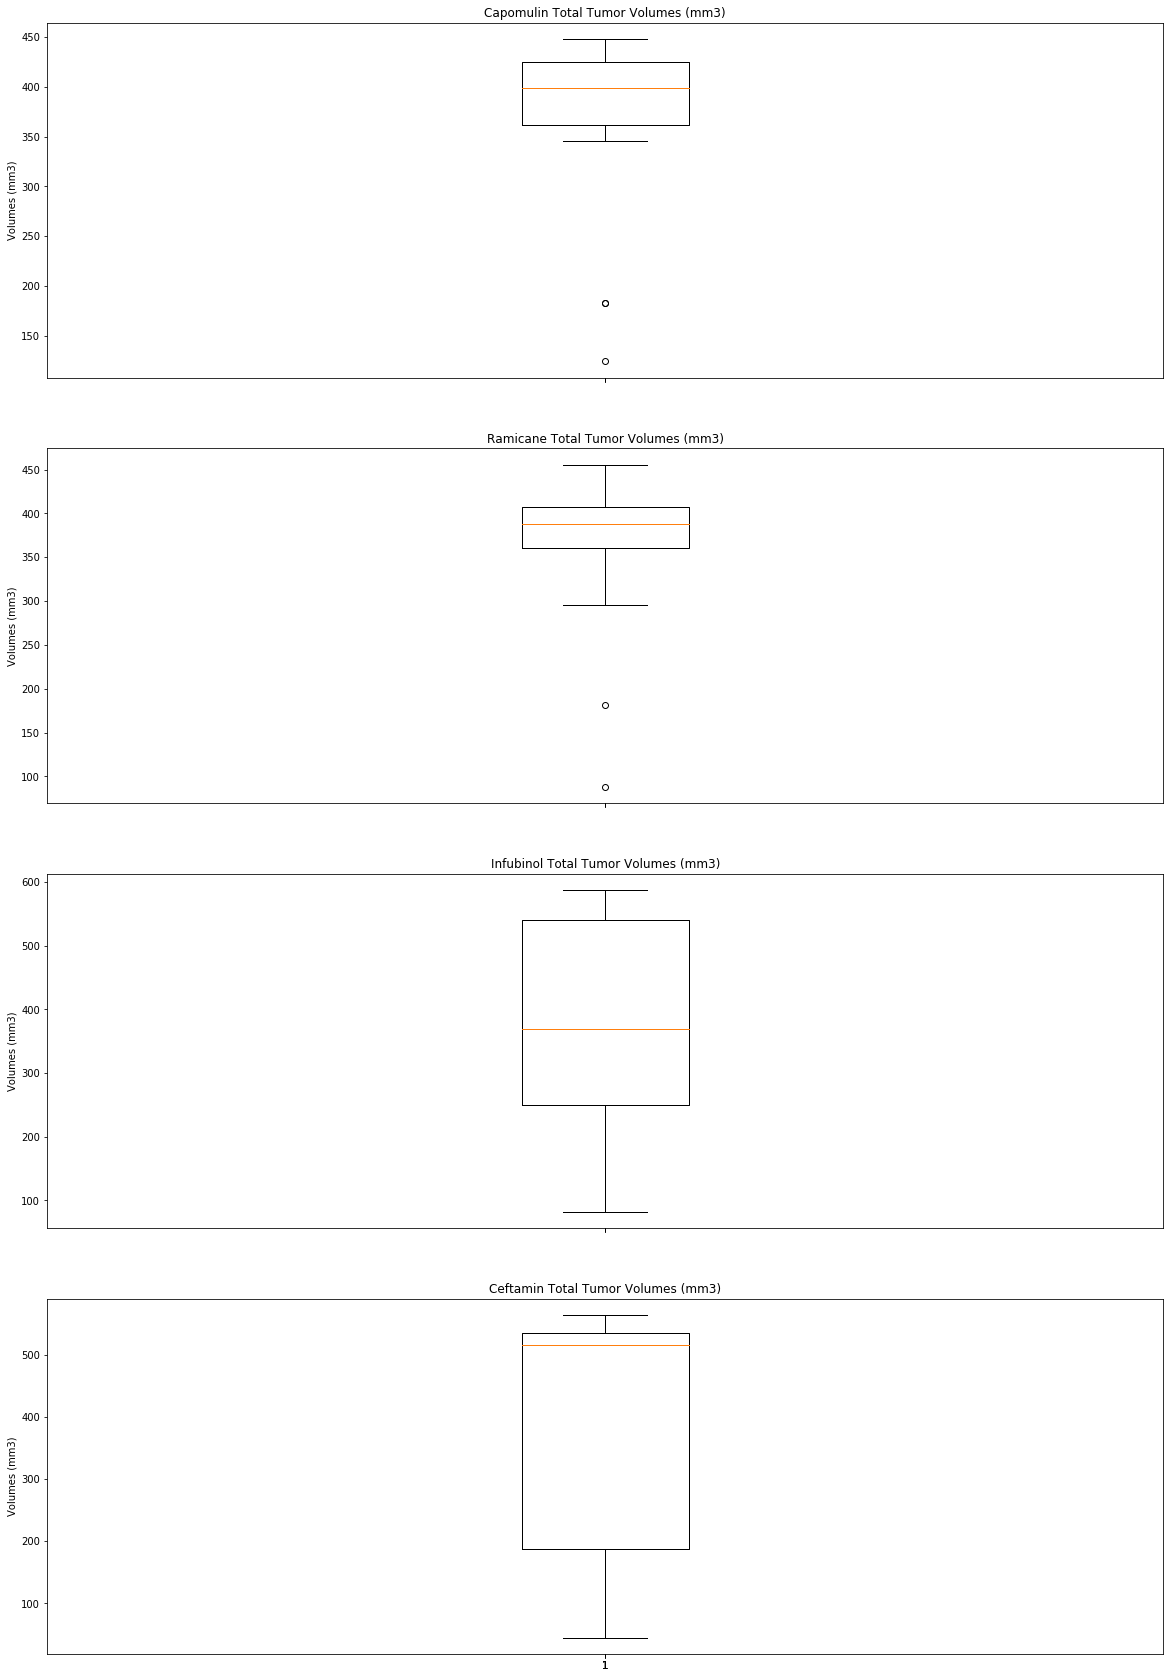

In [320]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True)
fig.set_size_inches(20,30)
ax1.boxplot(total_tumor_volumes_capomulin)
ax1.set_title('Capomulin Total Tumor Volumes (mm3)')
ax1.set_ylabel('Volumes (mm3)')
ax2.boxplot(total_tumor_volumes_ramicane)
ax2.set_title('Ramicane Total Tumor Volumes (mm3)')
ax2.set_ylabel('Volumes (mm3)')
ax3.boxplot(total_tumor_volumes_infubinol)
ax3.set_title('Infubinol Total Tumor Volumes (mm3)')
ax3.set_ylabel('Volumes (mm3)')
ax4.boxplot(total_tumor_volumes_ceftamin)
ax4.set_title('Ceftamin Total Tumor Volumes (mm3)')
ax4.set_ylabel('Volumes (mm3)')
plt.show()

## Line and scatter plots

In [23]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
data_files_grouped4 = data_files_df.groupby(['Mouse ID', 'Drug Regimen','Timepoint']).agg({
    'Tumor Volume (mm3)': 'sum',
}).rename(columns={ 'Tumor Volume (mm3)': 'Total Tumor Volume (mm3)' })
data_files_grouped4
mouse_timepoint_df = data_files_grouped4.reset_index()
mouse_timepoint_df = mouse_timepoint_df.set_index(['Mouse ID'])
mouse_timepoint_df = mouse_timepoint_df.loc[mouse_timepoint_df['Drug Regimen'] == 'Capomulin']
mouse_timepoint_df.head(40)

,Drug Regimen,Timepoint,Total Tumor Volume (mm3)
Mouse ID,,,
b128,Capomulin,0,45.000000
b128,Capomulin,5,45.651331
b128,Capomulin,10,43.270852
b128,Capomulin,15,43.784893
b128,Capomulin,20,42.731552
b128,Capomulin,25,43.262145
b128,Capomulin,30,40.605335
b128,Capomulin,35,37.967644
b128,Capomulin,40,38.379726


In [24]:
mouse_timepoint_df = mouse_timepoint_df.query('index == "g288"')
timepoint = mouse_timepoint_df['Timepoint']
tumor_volume = mouse_timepoint_df['Total Tumor Volume (mm3)']
mouse_timepoint_df

,Drug Regimen,Timepoint,Total Tumor Volume (mm3)
Mouse ID,,,
g288,Capomulin,0,45.000000
g288,Capomulin,5,45.839400
g288,Capomulin,10,46.304003
g288,Capomulin,15,42.172301
g288,Capomulin,20,42.957120
g288,Capomulin,25,42.368692
g288,Capomulin,30,42.874461
g288,Capomulin,35,38.954115
g288,Capomulin,40,36.356851


42


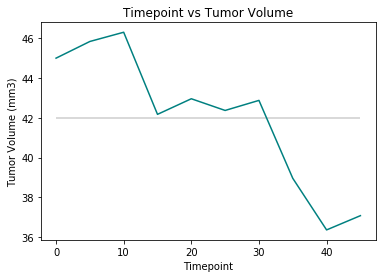

In [25]:
x_lim = mouse_timepoint_df['Timepoint'].max()
y_median = int(mouse_timepoint_df['Total Tumor Volume (mm3)'].median())
print(y_median)
plt.plot(timepoint, tumor_volume, color='teal')
plt.hlines(y_median,0,x_lim,alpha=0.2)
plt.title('Timepoint vs Tumor Volume')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint')
plt.show()

In [120]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
data_files_grouped4 = data_files_df.groupby(['Mouse ID', 'Drug Regimen','Weight (g)']).agg({
    'Tumor Volume (mm3)': 'mean',
}).rename(columns={ 'Tumor Volume (mm3)': 'Mean Tumor Volume (mm3)' })
mouse_weight_df = data_files_grouped4.reset_index()
mouse_weight_df = mouse_weight_df.set_index(['Mouse ID'])
mouse_weight_df = mouse_weight_df.loc[mouse_weight_df['Drug Regimen'] == 'Capomulin']
mouse_weight_df.head(40)

,Drug Regimen,Weight (g),Mean Tumor Volume (mm3)
Mouse ID,,,
b128,Capomulin,22,41.963636
b742,Capomulin,21,40.083699
f966,Capomulin,17,36.505973
g288,Capomulin,19,41.990097
g316,Capomulin,22,44.613344
i557,Capomulin,24,44.805810
i738,Capomulin,20,39.141053
j119,Capomulin,23,44.465236
j246,Capomulin,21,43.216925


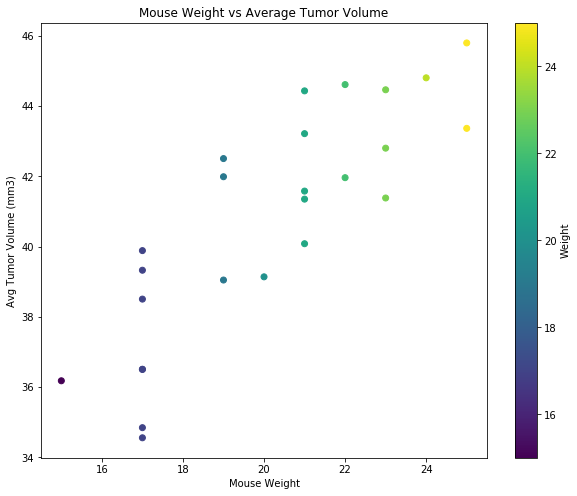

In [172]:
colors = mouse_weight_df['Weight (g)']
mouse_weight = mouse_weight_df['Weight (g)']
mean_tumor_volume = mouse_weight_df['Mean Tumor Volume (mm3)']
plt.figure(figsize=(10,8))
plt.scatter(mouse_weight, mean_tumor_volume, c=colors)
clb = plt.colorbar()
plt.title('Mouse Weight vs Average Tumor Volume')
plt.xlabel("Mouse Weight")
plt.ylabel('Avg Tumor Volume (mm3)')
clb.set_label('Weight')
plt.show()

In [ ]:
plt.scatter(mouse_weight, mean_tumor_volume)

In [176]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = mouse_weight_df['Weight (g)']
y_values = mouse_weight_df['Mean Tumor Volume (mm3)']
st.pearsonr(x_values, y_values)

(0.8419363424694717, 1.322572243471279e-07)

In [291]:
from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
colors = mouse_weight_df['Weight (g)']
mouse_weight = mouse_weight_df['Weight (g)']
mean_tumor_volume = mouse_weight_df['Mean Tumor Volume (mm3)']
print(x_values)
size = [int((x**1.6)) for x in x_values]
print(size)

Mouse ID
b128    22
b742    21
f966    17
g288    19
g316    22
i557    24
i738    20
j119    23
j246    21
l509    21
l897    19
m601    17
m957    19
r157    25
r554    17
r944    25
s185    17
s710    23
t565    17
u364    17
v923    21
w150    23
w914    21
x401    15
y793    17
Name: Weight (g), dtype: int64
[140, 130, 93, 111, 140, 161, 120, 150, 130, 130, 111, 93, 111, 172, 93, 172, 93, 150, 93, 93, 130, 150, 130, 76, 93]


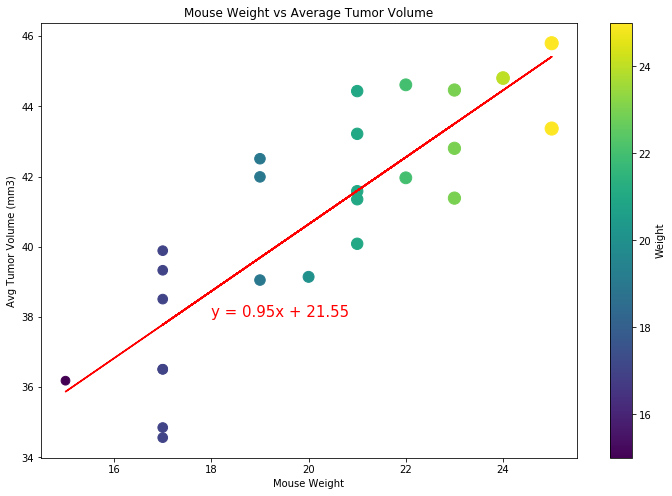

In [292]:
plt.figure(figsize=(12,8))
plt.scatter(x_values, y_values, c=colors, s=size)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,38),fontsize=15, color="red")
clb = plt.colorbar()
plt.title('Mouse Weight vs Average Tumor Volume')
plt.xlabel("Mouse Weight")
plt.ylabel('Avg Tumor Volume (mm3)')
clb.set_label('Weight')
plt.show()

# Matplotlib Homework - The Power of Plots

## Background

What good is data without a good plot to tell the story?

So, let's take what you've learned about Python Matplotlib and apply it to a real-world situation and dataset:

![Laboratory](../Images/Laboratory.jpg)

While your data companions rushed off to jobs in finance and government, you remained adamant that science was the way for you. Staying true to your mission, you've joined Pymaceuticals Inc., a burgeoning pharmaceutical company based out of San Diego. Pymaceuticals specializes in anti-cancer pharmaceuticals. In its most recent efforts, it began screening for potential treatments for squamous cell carcinoma (SCC), a commonly occurring form of skin cancer.

As a senior data analyst at the company, you've been given access to the complete data from their most recent animal study. In this study, 250 mice identified with SCC tumor growth were treated through a variety of drug regimens. Over the course of 45 days, tumor development was observed and measured. The purpose of this study was to compare the performance of Pymaceuticals' drug of interest, Capomulin, versus the other treatment regimens. You have been tasked by the executive team to generate all of the tables and figures needed for the technical report of the study. The executive team also has asked for a top-level summary of the study results.

## Instructions

Your tasks are to do the following:

* Generate a summary statistics table consisting of the mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen.

* Generate a bar plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot` that shows the number of data points for each treatment regimen.

  * **NOTE:** These plots should look identical.

* Generate a pie plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot` that shows the distribution of female or male mice in the study.

  * **NOTE:** These plots should look identical.

* Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

* Using Matplotlib, generate a box and whisker plot of the final tumor volume for all four treatment regimens and highlight any potential outliers in the plot by changing their color and style.

  **Hint**: All four box plots should be within the same figure. Use this [Matplotlib documentation page](https://matplotlib.org/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py) for help with changing the style of the outliers.

* Generate a line plot of time point versus tumor volume for a single mouse treated with Capomulin.

* Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.

* Calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume for the Capomulin treatment. Plot the linear regression model on top of the previous scatter plot.

* Look across all previously generated figures and tables and write at least three observations or inferences that can be made from the data. Include these observations at the top of notebook.

Here are some final considerations:

* You must use proper labeling of your plots, to include properties such as: plot titles, axis labels, legend labels, _x_-axis and _y_-axis limits, etc.

* See the [starter workbook](Pymaceuticals/pymaceuticals_starter.ipynb) for help on what modules to import and expected format of the notebook.

## Hints and Considerations

* Be warned: These are very challenging tasks. Be patient with yourself as you trudge through these problems. They will take time and there is no shame in fumbling along the way. Data visualization is equal parts exploration, equal parts resolution.

* You have been provided a starter notebook. Use the code comments as a reminder of steps to follow as you complete the assignment.

* Don't get bogged down in small details. Always focus on the big picture. If you can't figure out how to get a label to show up correctly, come back to it. Focus on getting the core skeleton of your notebook complete. You can always revisit old problems.

* While you are trying to complete this assignment, feel encouraged to constantly refer to Stack Overflow and the Pandas documentation. These are needed tools in every data analyst's tool belt.

* Remember, there are many ways to approach a data problem. The key is to break up your task into micro tasks. Try answering questions like:

  * How does my DataFrame need to be structured for me to have the right _x_-axis and _y_-axis?

  * How do I build a basic scatter plot?

  * How do I add a label to that scatter plot?

  * Where would the labels for that scatter plot come from?

  Again, don't let the magnitude of a programming task scare you off. Ultimately, every programming problem boils down to a handful of bite-sized tasks.

* Get help when you need it! There is never any shame in asking. But, as always, ask a _specific_ question. You'll never get a great answer to "I'm lost."

### Copyright

Trilogy Education Services © 2019. All Rights Reserved.